# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [348]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

## Load the Data

In [349]:
df =pd.read_csv("Traffic_Accidents.csv")

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [350]:
#Find the dataset information and observe the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [351]:
df.shape

(52000, 26)

In [352]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [353]:
df.tail()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51999,454710.0,185430.0,-1.212104,51.565050,43,3.0,3,1.0,24/05/2010,2,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2010


In [354]:
df.sample(10)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
20001,534120.0,192520.0,-0.064236,51.615485,1,3.0,1,1.0,14/10/2013,2,...,6,0,None within 50 metres,No physical crossing within 50 meters,NaN,Fine without high winds,Dry,1.0,Yes,2013
40288,296080.0,113500.0,-3.479585,50.911522,50,3.0,2,2.0,08/11/2007,5,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,1.0,Yes,2007
32660,362520.0,398940.0,-2.566315,53.485823,6,3.0,2,1.0,06/08/2009,5,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,No,2009
29273,515610.0,191830.0,-0.331682,51.613386,1,3.0,2,2.0,09/07/2007,2,...,5,0,Control by other authorised person,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2007
668,620470.0,228090.0,1.203839,51.907643,42,3.0,1,1.0,15/11/2006,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine with high winds,Wet/Damp,2.0,Yes,2006
34962,391930.0,392000.0,-2.122915,53.424721,6,3.0,2,1.0,20/11/2007,3,...,3,560,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,No,2007
23866,542470.0,135140.0,0.033322,51.097810,47,3.0,2,1.0,24/11/2012,7,...,3,22,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,1.0,No,2012
27082,558520.0,162270.0,0.274347,51.337365,46,3.0,3,2.0,25/05/2013,7,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2.0,Yes,2013
1851,393360.0,376570.0,-2.101067,53.286044,7,3.0,2,1.0,12/07/2006,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,No,2006
49805,441856.0,214149.0,-1.394099,51.824357,43,3.0,1,1.0,25/10/2014,7,...,3,4095,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2014


In [355]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [356]:
df.describe(exclude='number').T

,count,unique,top,freq
Date,52000,3286,04/11/2005,43
Local_Authority_(Highway),52000,206,E10000016,1465
Road_Type,52000,6,Single carriageway,38852
Pedestrian_Crossing-Human_Control,52000,3,None within 50 metres,51718
Pedestrian_Crossing-Physical_Facilities,52000,6,No physical crossing within 50 meters,43368
Light_Conditions,51456,5,Daylight: Street light present,37734
Weather_Conditions,52000,9,Fine without high winds,41662
Road_Surface_Conditions,52000,6,Dry,35727
Did_Police_Officer_Attend_Scene_of_Accident,52000,2,Yes,42143


In [357]:
df.isna().sum()

Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                               322
Number_of_Vehicles                                0
Number_of_Casualties                           1041
Date                                              0
Day_of_Week                                       0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
2nd_Road_Class                                    0
2nd_Road_Number                                   0
Pedestrian_Crossing-Human_Control                 0
Pedestrian_C

In [358]:
df.isna().mean()*100

Location_Easting_OSGR                          0.000000
Location_Northing_OSGR                         0.000000
Longitude                                      0.000000
Latitude                                       0.000000
Police_Force                                   0.000000
Accident_Severity                              0.619231
Number_of_Vehicles                             0.000000
Number_of_Casualties                           2.001923
Date                                           0.000000
Day_of_Week                                    0.000000
Local_Authority_(District)                     0.000000
Local_Authority_(Highway)                      0.000000
1st_Road_Class                                 0.000000
1st_Road_Number                                0.000000
Road_Type                                      0.000000
Speed_limit                                    0.000000
2nd_Road_Class                                 0.000000
2nd_Road_Number                                0

In [359]:
df.duplicated().sum()

43

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [360]:
# drop rows of missig values
df=df.dropna()

In [361]:
#drop duplicated values
df=df.drop_duplicates()

In [362]:
df['Date']=pd.to_datetime(df['Date']) # convert date type

C:\Users\hayoo\AppData\Local\Temp\ipykernel_46252\123920076.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=pd.to_datetime(df['Date']) # convert date type


In [363]:
df['Month']=df['Date'].dt.month # extract month as new feature

In [364]:
# Encoding categorical 
encoder=LabelEncoder()
df['Local_Authority_(Highway)']=encoder.fit_transform(df['Local_Authority_(Highway)'])
df['Road_Type']=encoder.fit_transform(df['Road_Type'])
df['Pedestrian_Crossing-Human_Control']=encoder.fit_transform(df['Pedestrian_Crossing-Human_Control'])
df['Pedestrian_Crossing-Physical_Facilities']=encoder.fit_transform(df['Pedestrian_Crossing-Physical_Facilities'])
df['Light_Conditions']=encoder.fit_transform(df['Light_Conditions'])
df['Weather_Conditions']=encoder.fit_transform(df['Weather_Conditions'])
df['Road_Surface_Conditions']=encoder.fit_transform(df['Road_Surface_Conditions'])
df['Did_Police_Officer_Attend_Scene_of_Accident']=encoder.fit_transform(df['Did_Police_Officer_Attend_Scene_of_Accident'])

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49986 entries, 0 to 51999
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Location_Easting_OSGR                        49986 non-null  float64       
 1   Location_Northing_OSGR                       49986 non-null  float64       
 2   Longitude                                    49986 non-null  float64       
 3   Latitude                                     49986 non-null  float64       
 4   Police_Force                                 49986 non-null  int64         
 5   Accident_Severity                            49986 non-null  float64       
 6   Number_of_Vehicles                           49986 non-null  int64         
 7   Number_of_Casualties                         49986 non-null  float64       
 8   Date                                         49986 non-null  datetime64[ns]
 9   

<function matplotlib.pyplot.show(close=None, block=None)>

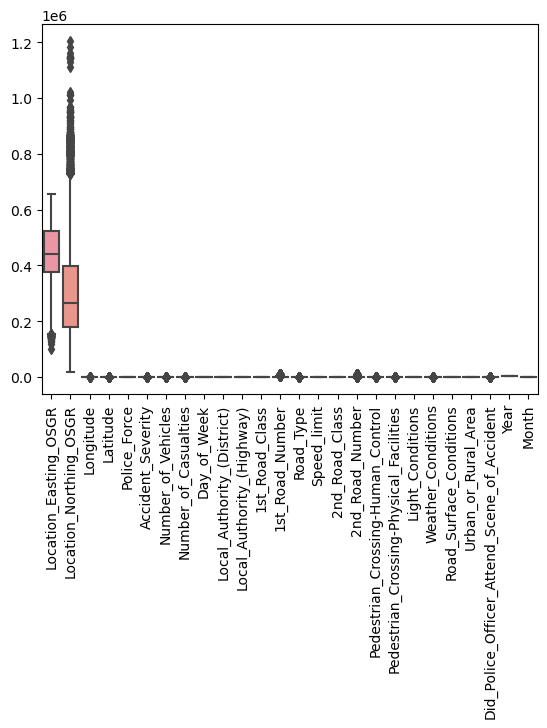

In [366]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show

In [367]:
import numpy as np

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'Location_Northing_OSGR')

<function matplotlib.pyplot.show(close=None, block=None)>

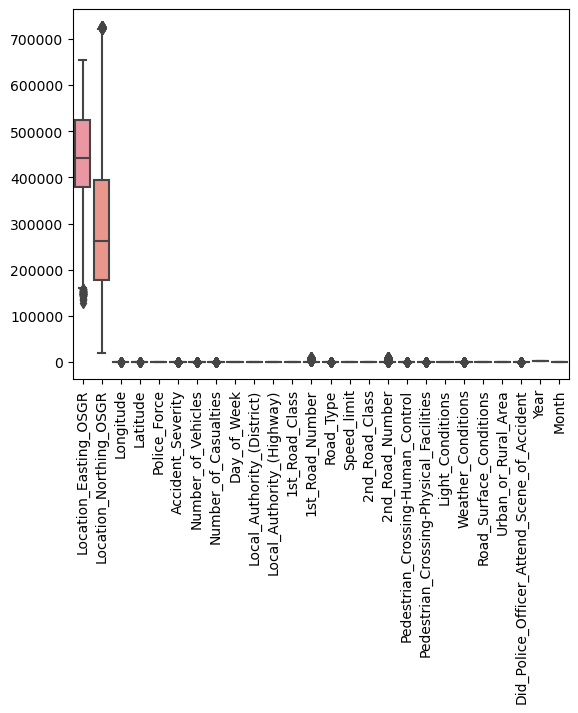

In [368]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show

In [369]:
df.shape

(49259, 27)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [415]:
feature_col=['Accident_Severity','Number_of_Vehicles','Day_of_Week','Speed_limit',
            'Weather_Conditions','Light_Conditions','Road_Surface_Conditions','Urban_or_Rural_Area']
X=df[feature_col]

In [416]:
#Feature Scaling
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [417]:
pca= PCA(n_components=2)
X=pca.fit_transform(X)

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<Axes: xlabel='Latitude', ylabel='Longitude'>

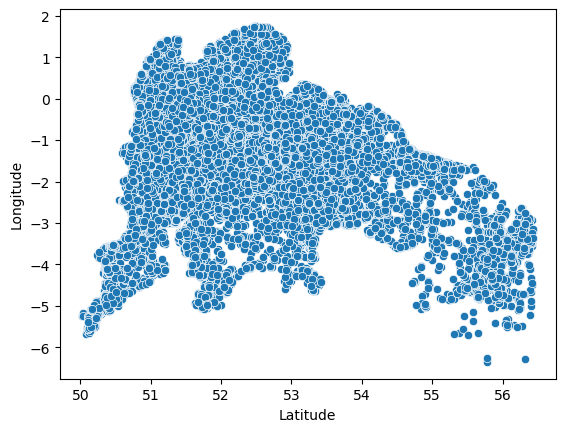

In [418]:
sns.scatterplot(data=df, x="Latitude", y="Longitude")

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [419]:
interia=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)
    interia.append(kmeans.inertia_)

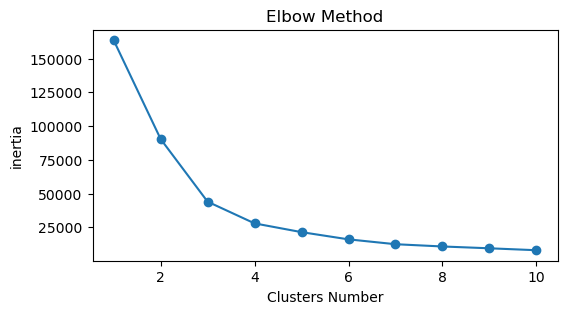

In [439]:
plt.figure(figsize=(6, 3))
plt.plot(range(1, 11), interia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Clusters Number')
plt.ylabel('inertia')
plt.show()

In [433]:
kmeans=KMeans(n_clusters=4, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=4, n_init=10)

In [434]:
predict=kmeans.predict(X)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [435]:
silhouette_score(X,predict)

0.6024777369437881

## Plot the data points with their predicted cluster center

In [436]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[ 0.25149119, -1.92227378],
       [ 1.21087739,  1.38424249],
       [-1.10135412,  0.19651509],
       [ 2.67304057, -0.8075448 ]])

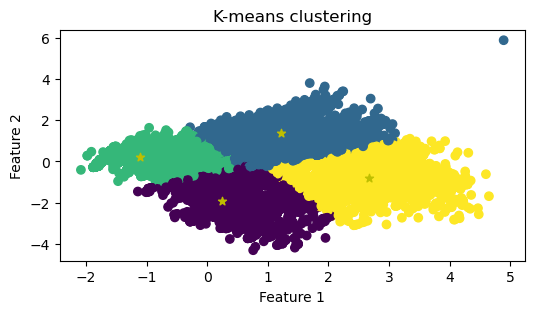

In [441]:
plt.figure(figsize=(6,3))
plt.scatter(X[:,0], X[:,1], c=predict, cmap='viridis')
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c='y', marker='*')
plt.title("K-means clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?